# Learning to use iloc and loc when plotting

For this lecture, I am going to be taking you through a step by step process on how to create varying effects with iloc and loc. At the end of this lecture, you should be able to understand how to manipulate charts and create beautiful effects just the way you want.

I will take you through a step-by-step process on how to create the chart below

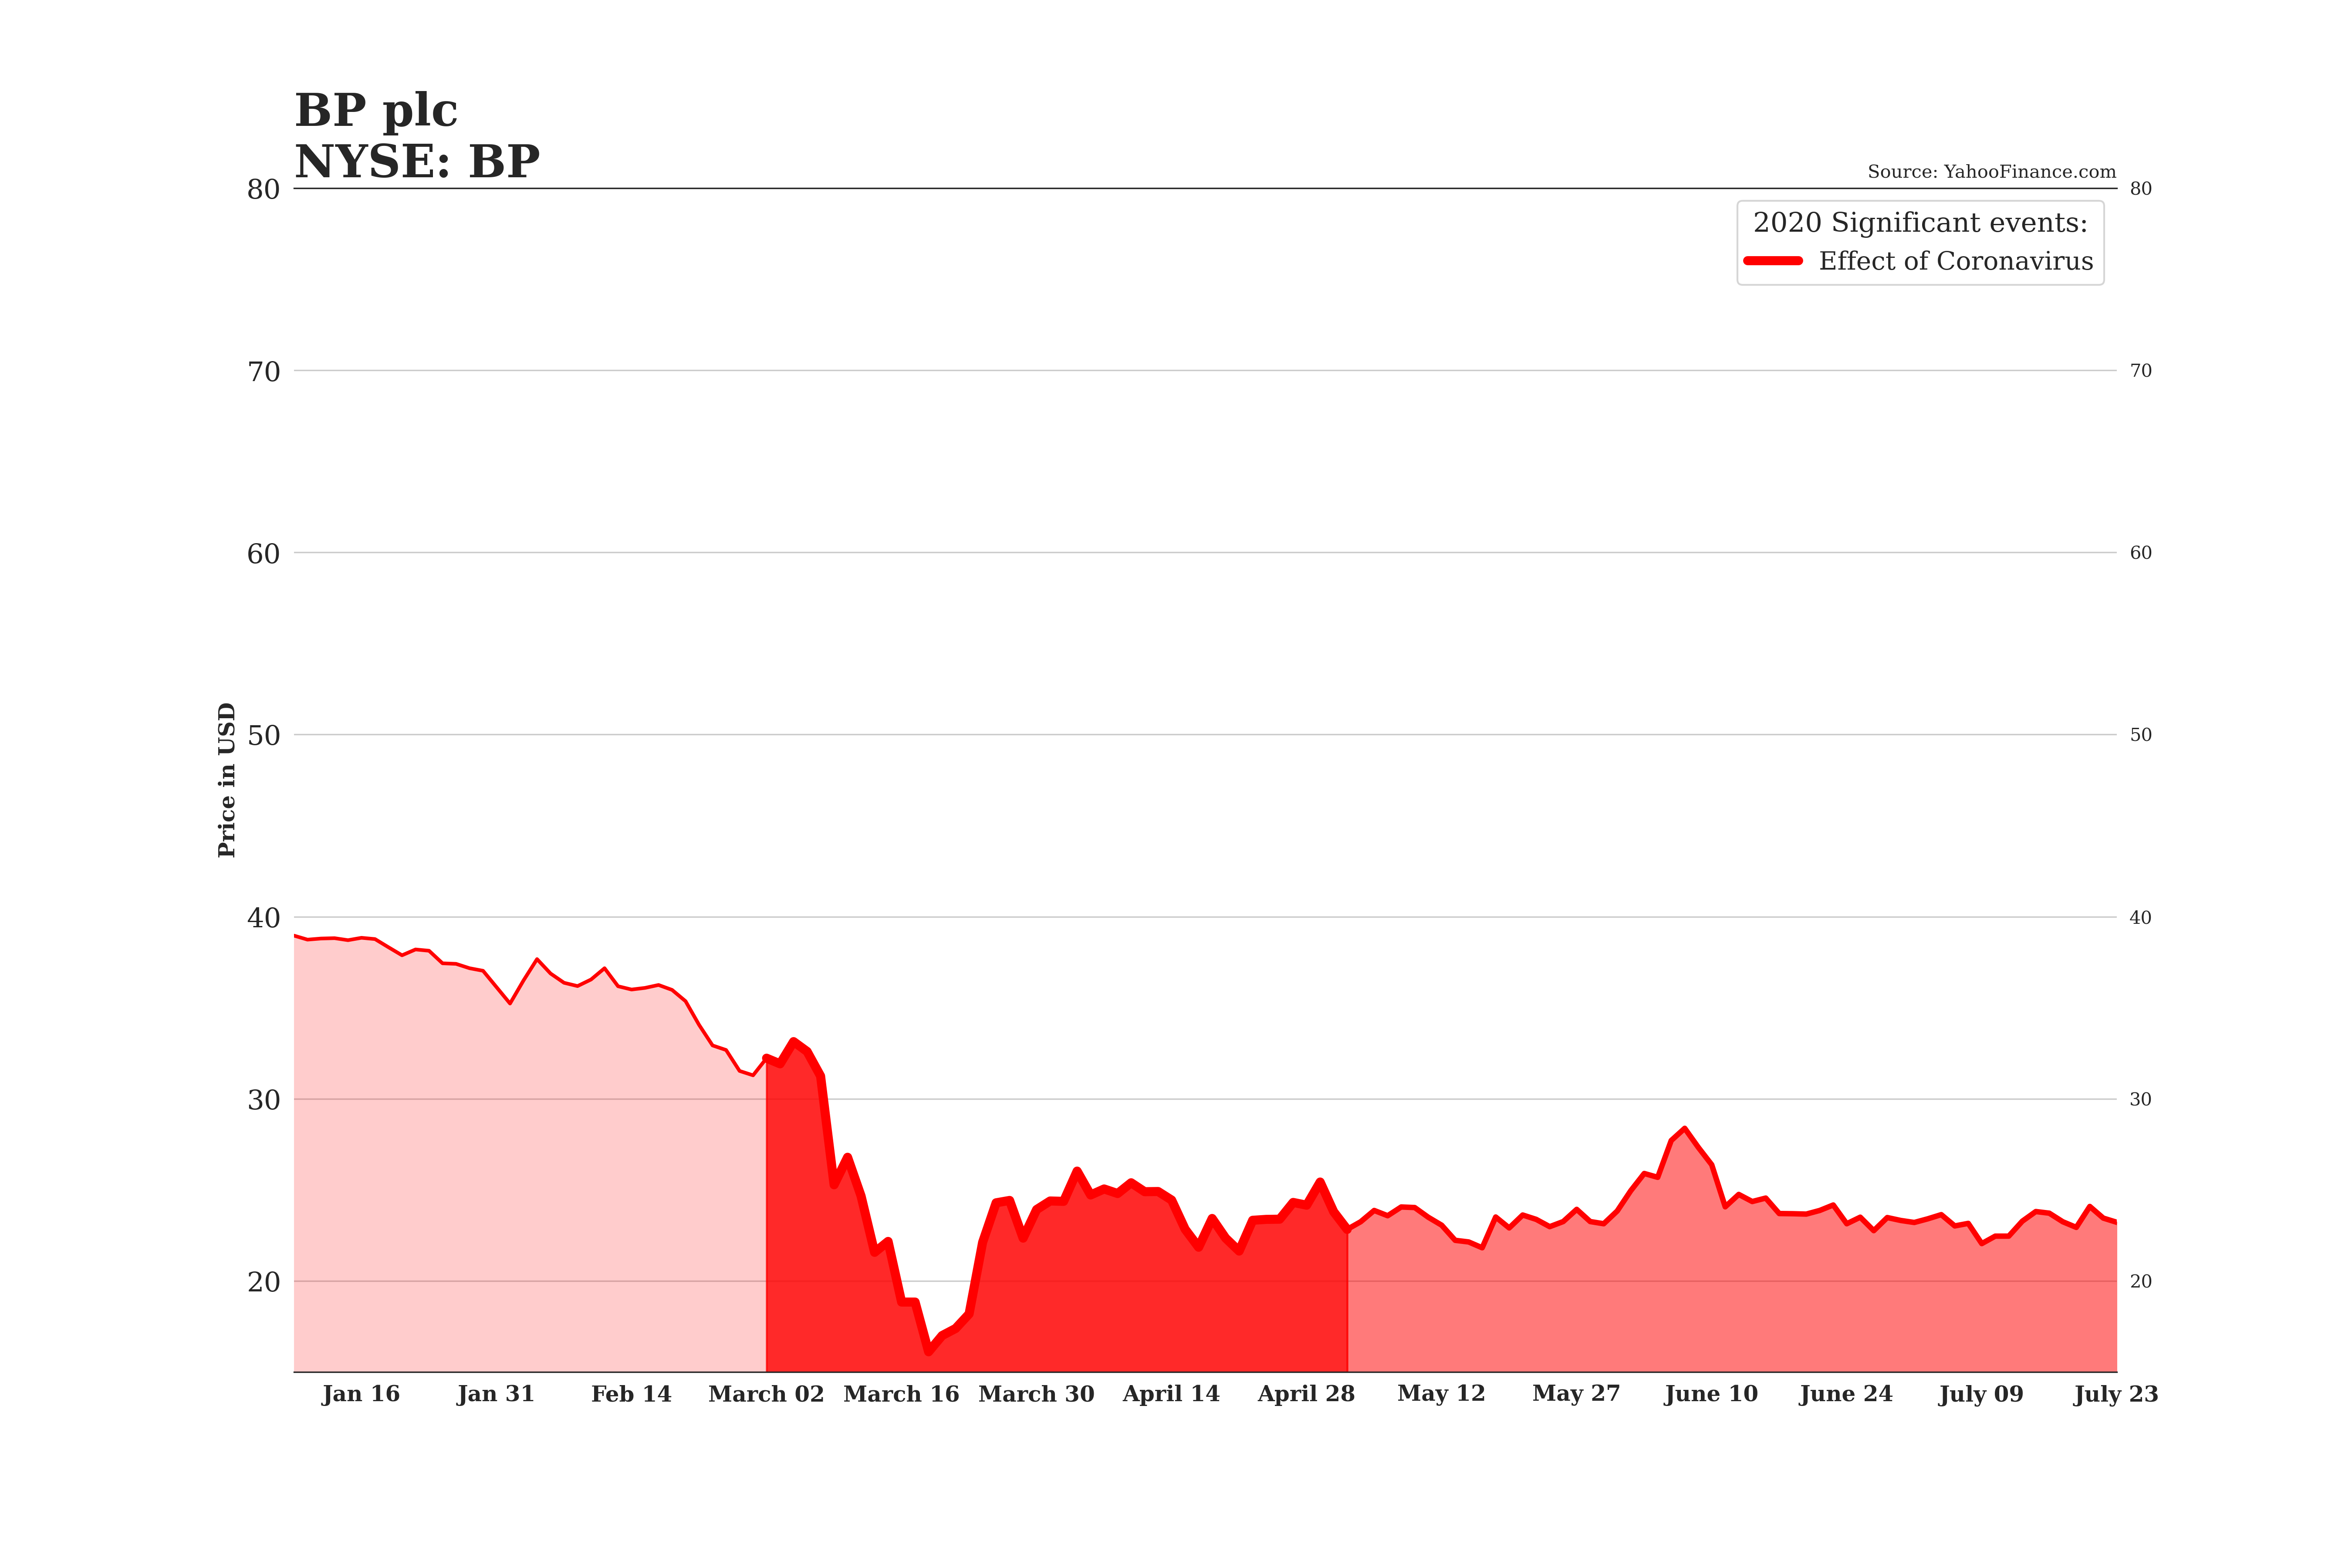

In [2]:
#first of all, import the modules and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

bp = pd.read_csv('/Users/Hp/Desktop/BP.csv')

In [3]:
#Let us take a look at the data types of the csv file
bp.dtypes
'''From the look of things below, we will be needing only the date column
    and the Adj Close column, we might have to convert the date column to a 
    datetime column so that we can access the date, month, day without stress'''

'From the look of things below, we will be needing only the date column\n    and the Adj Close column, we might have to convert the date column to a \n    datetime column so that we can access the date, month, day without stress'

In [4]:
bp

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2020,38.040001,38.150002,37.869999,38.139999,36.511806,6565100
1,1/3/2020,38.480000,39.090000,38.459999,38.830002,37.172352,14000800
2,1/6/2020,39.680000,40.080002,39.660000,39.849998,38.148804,15091700
3,1/7/2020,39.360001,39.480000,39.000000,39.430000,37.746738,12494200
4,1/8/2020,39.240002,39.299999,38.590000,38.830002,37.172352,9335500
...,...,...,...,...,...,...,...
137,7/20/2020,23.230000,23.420000,22.930000,22.940001,22.940001,7636200
138,7/21/2020,23.410000,24.480000,23.350000,24.090000,24.090000,13615500
139,7/22/2020,23.620001,23.650000,23.250000,23.450001,23.450001,8184500
140,7/23/2020,23.110001,23.320000,23.020000,23.219999,23.219999,9070500


In [5]:
#Trying to convert the Date column to a datetime column
bp['Date'] = pd.to_datetime(bp['Date'])

In [6]:
#Let us confirm to see if it worked
print(bp.dtypes)
'''Great! it worked, our Date column is now a datetime object
    let us niw import our datetime module and start accessing the
    month and date characters'''

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


'Great! it worked, our Date column is now a datetime object\n    let us niw import our datetime module and start accessing the\n    month and date characters'

In [7]:
#importing the datetime module
import datetime as dt

In [8]:
#Let us take a look at some of the methods available for us to use
dir(bp['Date'].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',

In [9]:
bp['Day'] = bp['Date'].dt.day#this method helps to get the day from the month column, no need for parenthesis
bp['Month'] = bp['Date'].dt.month_name()#this method helps to get the name of the month, parenthesid requires

'''You can use help to find out more about the methods above'''


'You can use help to find out more about the methods above'

In [10]:
print(bp.dtypes)

'''Now we can see that two new columns have been created, the day column which is an integer and the month column
    which is an object, we have to be able to convert them to string and concantenate both of them.'''

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Day                   int64
Month                object
dtype: object


'Now we can see that two new columns have been created, the day column which is an integer and the month column\n    which is an object, we have to be able to convert them to string and concantenate both of them.'

In [11]:
#concantenating the columns to create a new one
bp['ndate'] = bp['Month']+'-'+bp['Day'].astype('str')

'''We have succesfully created the last column we weill need, we needed to identify the Day column as a string instead
    of its original form as an integer because we had to concantenate'''

'We have succesfully created the last column we weill need, we needed to identify the Day column as a string instead\n    of its original form as an integer because we had to concantenate'

In [12]:
#Making the bp['ndate'] the index

bp = bp.set_index(bp['ndate'])

'''We needed to set the ndate column as our index, this will help in accessing the data easily when we begin plotting
    becaause the style of plotting depends on certain periods tha can be identified using a particular date.
    This can not always be used, only when you are dealing with dates.'''

'We needed to set the ndate column as our index, this will help in accessing the data easily when we begin plotting\n    becaause the style of plotting depends on certain periods tha can be identified using a particular date.\n    This can not always be used, only when you are dealing with dates.'

In [13]:
bp

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,ndate
ndate,,,,,,,,,,
January-2,2020-01-02,38.040001,38.150002,37.869999,38.139999,36.511806,6565100,2,January,January-2
January-3,2020-01-03,38.480000,39.090000,38.459999,38.830002,37.172352,14000800,3,January,January-3
January-6,2020-01-06,39.680000,40.080002,39.660000,39.849998,38.148804,15091700,6,January,January-6
January-7,2020-01-07,39.360001,39.480000,39.000000,39.430000,37.746738,12494200,7,January,January-7
January-8,2020-01-08,39.240002,39.299999,38.590000,38.830002,37.172352,9335500,8,January,January-8
...,...,...,...,...,...,...,...,...,...,...
July-20,2020-07-20,23.230000,23.420000,22.930000,22.940001,22.940001,7636200,20,July,July-20
July-21,2020-07-21,23.410000,24.480000,23.350000,24.090000,24.090000,13615500,21,July,July-21
July-22,2020-07-22,23.620001,23.650000,23.250000,23.450001,23.450001,8184500,22,July,July-22


<b>Let us understand the difference between loc and iloc

loc is used with both strings and integers
iloc is used with integers only

They can both be used on dataframes

They can both be used on series but loc will work with dataframes that have its indexs as labels(strings) while iloc will work on index that are integers.

For this chart, we will be using loc while plotting because the ndate column which is our index is a string.

In [14]:
help(bp.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection by Labe

In [15]:
help(bp['Date'].iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on some value.
 |  
 |  ``.iloc`` will raise ``IndexError`` if a requested indexer is
 |  out-of-bounds, except *slice* indexers which allow out-of-bounds
 |  indexing (this conforms with python/numpy *sli

<b>Let us start creating our plot

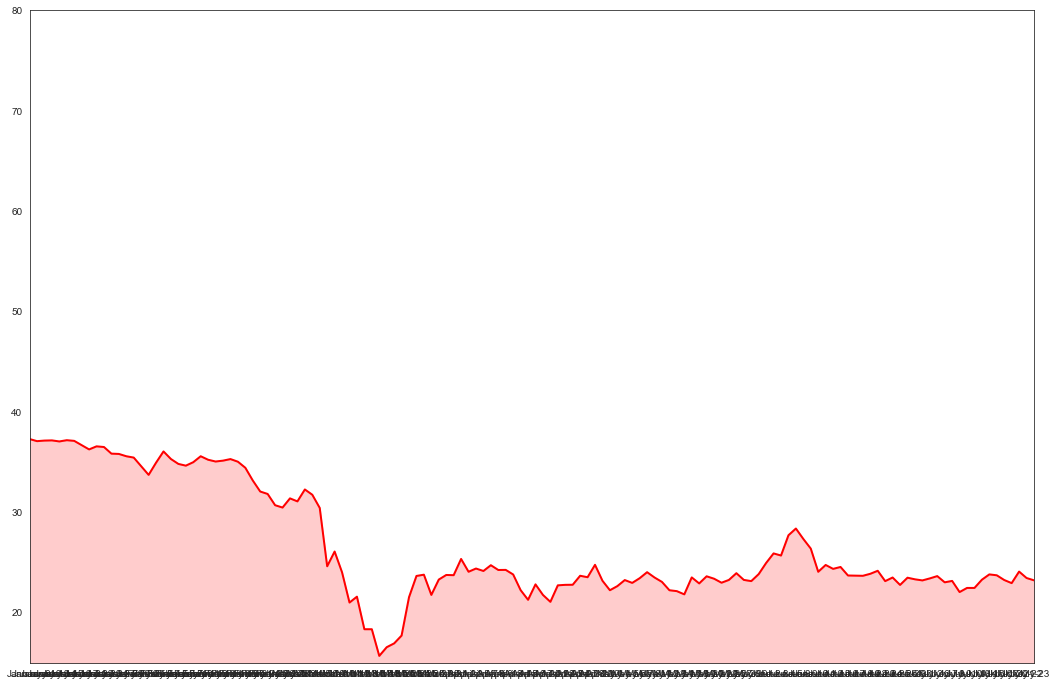

'From the diagram below, we can see what the few lines of code can produce<br>\n    few things we need to do is to:<br>\n    -Take care of the xticks and xticks labels<br>\n    -Add other significant events to the charts<br>'

In [16]:
fig, ax = plt.subplots(figsize = (18,12))
plt.ylim(15,80)
plt.xlim(5,140)
ax.plot(bp['ndate'].loc['January-2':], bp['Adj Close'].loc['January-2':], 'r', lw = 2)
ax.fill_between(bp['ndate'].loc['January-2':], bp['Adj Close'].loc['January-2':], color = 'red', alpha = 0.2)
plt.show()

#Try to play around with 'alpha' to see the varying effects

'''From the diagram below, we can see what the few lines of code can produce<br>
    few things we need to do is to:<br>
    -Take care of the xticks and xticks labels<br>
    -Add other significant events to the charts<br>'''

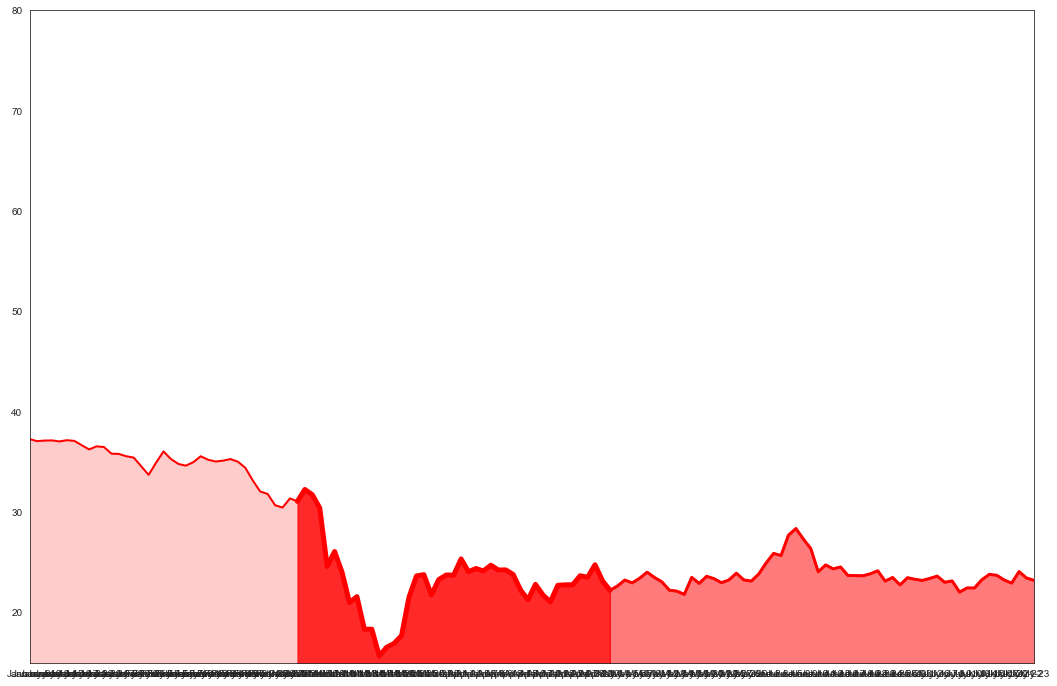

'From the chart below, we are half way done, what are the things you should take note of\n1-How I i use loc to reference where I need to plot\n2-How I use alpha(opacity) to add specific customizations\n3-How I use lw to specify extra details\n4-How the ax.fill_between and ax.plot were used cohesively\n\nPlease take a look at the chart below and the one initially made, what differences do you notice\nTry to identify the exact lines of code that were added that made a diffrence'

In [17]:
fig, ax = plt.subplots(figsize = (18,12))
plt.ylim(15,80)
plt.xlim(5,140)
ax.plot(bp['ndate'].loc['January-2':], bp['Adj Close'].loc['January-2':], 'r', lw = 2)
ax.fill_between(bp['ndate'].loc['January-2':], bp['Adj Close'].loc['January-2':], color = 'red', alpha = 0.2)
#new lines of code
ax.plot(bp['ndate'].loc['March-3':'May-1'], bp['Adj Close'].loc['March-3':'May-1'], 'r', lw = 5, label = 'Effect of Coronavirus')
ax.fill_between(bp['ndate'].loc['March-3':'May-1'], bp['Adj Close'].loc['March-3':'May-1'], color = 'red', alpha = 0.8)
ax.plot(bp['ndate'].loc['May-1':], bp['Adj Close'].loc['May-1':], 'r', lw = 3)
ax.fill_between(bp['ndate'].loc['May-1':], bp['Adj Close'].loc['May-1':], color = 'red', alpha = 0.4)
plt.show()


'''From the chart below, we are half way done, what are the things you should take note of
1-How I i use loc to reference where I need to plot
2-How I use alpha(opacity) to add specific customizations
3-How I use lw to specify extra details
4-How the ax.fill_between and ax.plot were used cohesively

Please take a look at the chart below and the one initially made, what differences do you notice
Try to identify the exact lines of code that were added that made a diffrence'''


Text(1.0, 1.0, 'Source: YahooFinance.com')

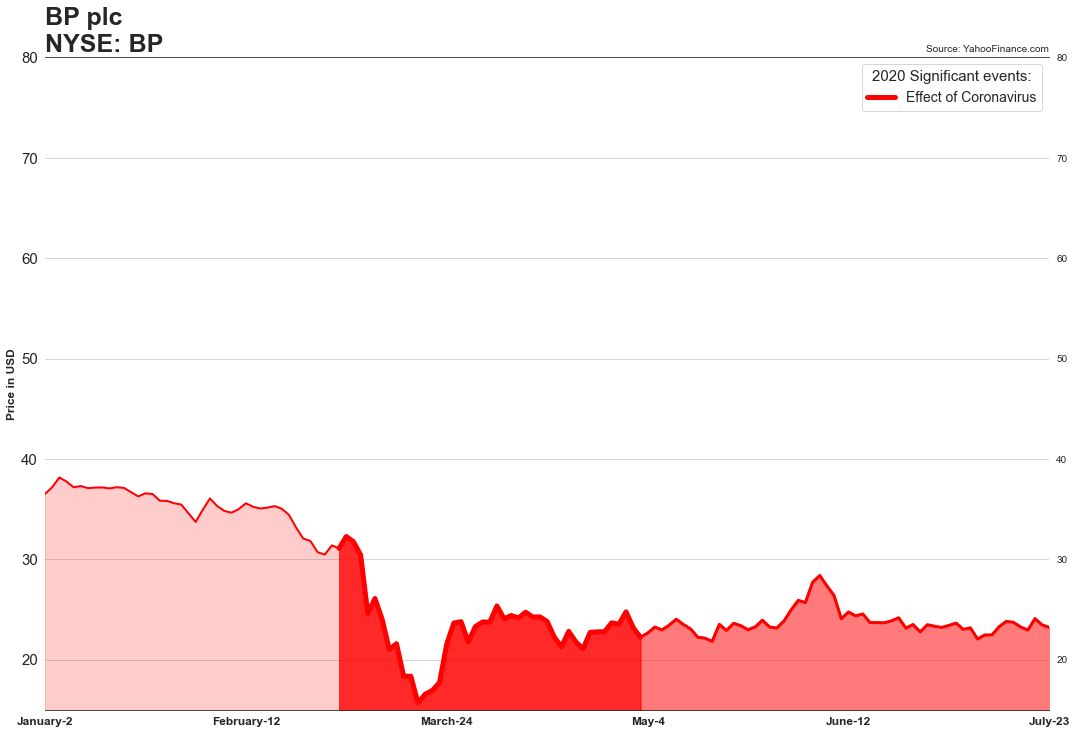

In [18]:
fig, ax = plt.subplots(figsize = (18,12))
plt.ylim(15,80)
plt.xlim(5,140)
ax.plot(bp['ndate'].loc['January-2':], bp['Adj Close'].loc['January-2':], 'r', lw = 2)
ax.fill_between(bp['ndate'].loc['January-2':], bp['Adj Close'].loc['January-2':], color = 'red', alpha = 0.2)
ax.plot(bp['ndate'].loc['March-3':'May-1'], bp['Adj Close'].loc['March-3':'May-1'], 'r', lw = 5, label = 'Effect of Coronavirus')
ax.fill_between(bp['ndate'].loc['March-3':'May-1'], bp['Adj Close'].loc['March-3':'May-1'], color = 'red', alpha = 0.8)
ax.plot(bp['ndate'].loc['May-1':], bp['Adj Close'].loc['May-1':], 'r', lw = 3)
ax.fill_between(bp['ndate'].loc['May-1':], bp['Adj Close'].loc['May-1':], color = 'red', alpha = 0.4)
plt.xticks(np.arange(0,142,28))
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 15)
ax.spines['right'].set_visible(False)                        
ax.spines['left'].set_visible(False)
plt.tick_params(labeltop = False, labelright = True)                             
plt.grid(which = 'major', axis = 'y')
plt.ylabel('Price in USD', fontsize = 12, fontweight = 'bold')
plt.legend(loc = 'upper right', fontsize = 14, title = '2020 Significant events:', title_fontsize = 15, markerfirst = True, fancybox = True)
plt.title('BP plc\nNYSE: BP', fontsize = 25, fontweight = 'bold', loc = 'left')
plt.title('Source: YahooFinance.com', fontsize = 10, loc = 'right')

In [19]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

In [20]:
ff = np.arange(0,142,28)
ff

array([  0,  28,  56,  84, 112, 140])

In [21]:
len(bp)#this is how the xticks idea was set into motion

142

Now, you have succesfully created the chart and saved it as a png file to your desktop, it is time to create your own chart using the data below.

# Assignment

In [ ]:
#Read the instructions below
rop = pd.read_csv('/Users/Hp/Desktop/rop.csv')#change directory
rop = rop.dropna()

Create the chart below using the data above!<br>
Take note that for the labels attached to the plots, you are going to use plt.text, you can use the help function for extra formatting.<br>
Also, make sure you change the xticklabels to Jan, Feb, March... like the one created above.<br>
Take note of the following dates that will be used in your plots:<br>
March 6 - April 8: Saudi and Russia Price war<br>
April 9 - April 21: Reports of Storage Issues<br>
April 21 - May 1: Oil markets starts to rebalance<br>
May 2: OPEC starts output cuts<br>

Note: You are to use data from January - July only



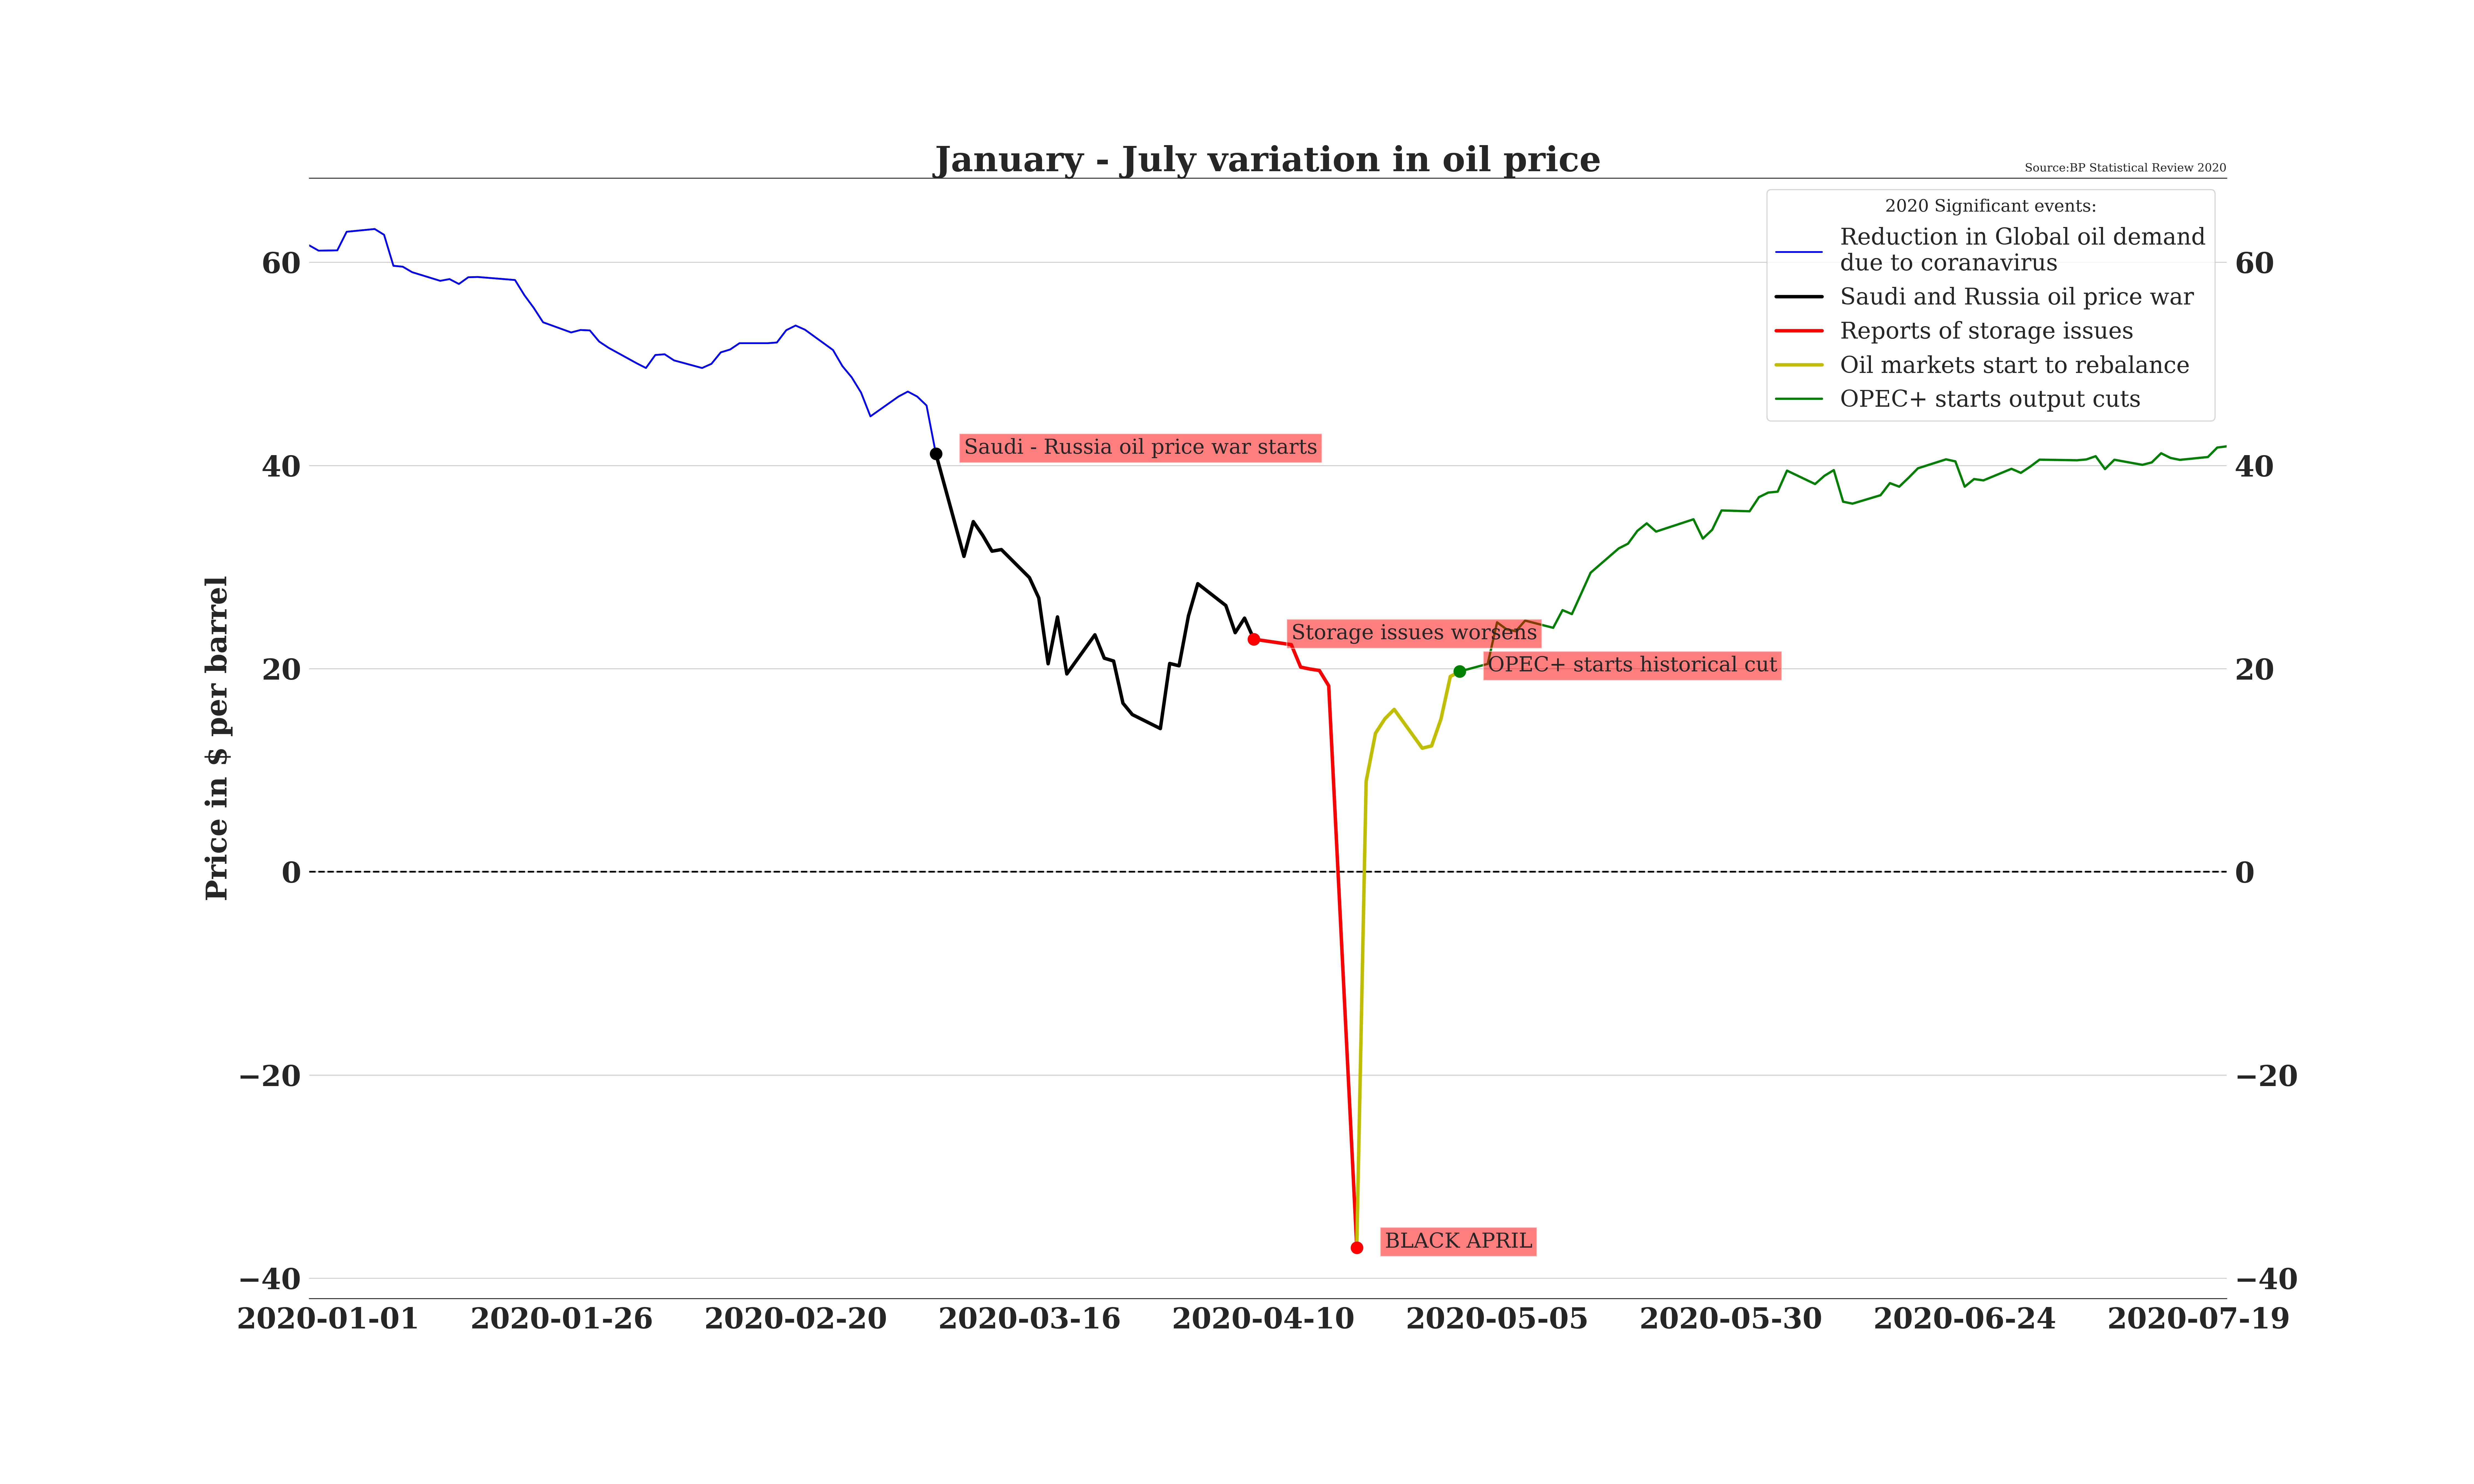

In [ ]:
#to save file in high format, uncomment and use the code below:

#plt.savefig('/Users/Hp/Desktop/ass1.png', dpi = 300)
#make sure you change the directory to yours